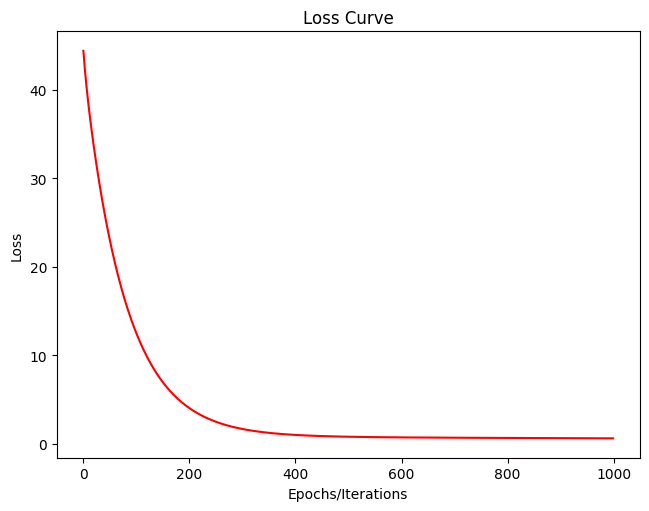

Learned weight (w): Parameter containing:
tensor([[ 2.7061, -1.5421]], requires_grad=True)
Learned bias (b): Parameter containing:
tensor([0.2517], requires_grad=True)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

X1 = torch.tensor([3, 4, 5, 6, 2]).view(-1, 1).float()
X2 = torch.tensor([8, 5, 7, 3, 1]).view(-1, 1).float()
Y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).view(-1, 1).float()
iters = 1000

X = torch.cat((X1, X2), dim=1)

class MLR(nn.Module):
    def __init__(self):
        super(MLR, self).__init__()
        self.linear = nn.Linear(2, 1)  # 2 features, 1 output

    def forward(self, x):
        return self.linear(x)

model = MLR()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# List to store the loss values for plotting
loss_list = []
for epoch in range(iters):
    model.train()

    # Forward pass
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_list.append(loss.item())

plt.plot(loss_list, 'r')
plt.tight_layout()
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

print("Learned weight (w):", model.linear.weight)
print("Learned bias (b):", model.linear.bias)